# Make a prediction

In [ ]:
## Setup

In [10]:
import keras
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
# scratch directory is apart of the .gitignore to ensure it is not committed to git
%env SCRATCH=../scratch
! [ -e "${SCRATCH}" ] || mkdir -p "${SCRATCH}"

scratch_path = os.environ.get('SCRATCH', './scratch')

env: SCRATCH=../scratch


## Crop the border on the real images

In [12]:
# Set the paths for input directories and output directories
input_directories = [scratch_path + "/real/"]
output_directories = [scratch_path + "/processed", scratch_path + "/processed"]

# Create the output directories if they don't exist
for directory in output_directories:
    os.makedirs(directory, exist_ok=True)

# Iterate through the input directories
for input_directory, output_directory in zip(input_directories, output_directories):
    # Iterate through the files in the input directory
    for filename in os.listdir(input_directory):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            input_path = os.path.join(input_directory, filename)
            output_path = os.path.join(output_directory, filename)

            # Read the input image
            image = cv2.imread(input_path)

            # Perform numpy array slicing on the image
            fingerprint = image[5:99, 2:92]

            # Write the altered image to the output directory
            cv2.imwrite(output_path, fingerprint)

## Load a new processed fingerprint

In [19]:
# set variables for consistency
img_height = 96              # desired height
img_width = 96               # desired width
batch_size = 32              # batch inputs in 32
seed_train_validation = 42   # Must be same for train_ds and val_ds
validation_split = 0.3       # move 30% of the data into validation
class_names=['left','right']

Files in path: 6001
Selected: 238__M_Right_little_finger.png
shape: (96, 96, 1)
shape: float32
shape: 9216


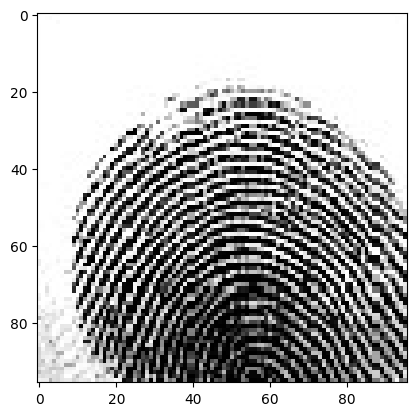

In [16]:
# select random images
import random

samples_path = scratch_path + '/processed/'
file_list = os.listdir(samples_path)
print('Files in path: ' + str(len(file_list)))

test_image = random.choice(file_list)
print('Selected: ' + test_image)

# loads an image into PIL format.
img = tf.keras.utils.load_img(
    samples_path + test_image,
    color_mode="grayscale",
    target_size=(img_height, img_width),
    interpolation='nearest',
)

plt.imshow(img, cmap='gray')

# converts a PIL image instance to a numpy array
img_array = tf.keras.utils.img_to_array(img)
print("shape:",img_array.shape)
print("shape:",img_array.dtype)
print("shape:",img_array.size)

img_array = tf.expand_dims(img_array, 0)

## Load the trained model

In [14]:
model = keras.models.load_model(scratch_path + '/models/fingerprint/1/model.savedmodel/')

## Make a prediction

In [17]:
# perform a prediction on the new fingerprint
predictions = model.predict(img_array)

2023-06-02 00:00:26.350718: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700


1/1 [==============================] - 2s 2s/step


In [21]:
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} hand with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to right hand with a 73.01 percent confidence.
